In [12]:
# install package scifuzz
!pip install scikit-fuzzy


In [11]:
# Import Library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# Define Variables
x_DError = np.arange(0, 100, 1) #Delta Error (RPM)
x_Error = np.arange(0, 1000, 1) #Error (RPM)
x_Speed = np.arange(0, 5000, 1) #Speed of motor (RPM)

In [3]:
# Determining Range
DError_SM = fuzz.trimf(x_DError, [0, 20, 40]) #Small
DError_IM = fuzz.trimf(x_DError, [30, 50, 70]) #Intermediate
DError_LG = fuzz.trimf(x_DError, [60, 80, 100]) #Large

Error_LE = fuzz.trapmf(x_Error, [0, 100, 300, 400]) #Little
Error_ME = fuzz.trapmf(x_Error, [350, 450, 650, 750]) #Middle
Error_BE = fuzz.trapmf(x_Error, [600, 700, 900, 1000]) #Big

Speed_LW  = fuzz.trimf(x_Speed, [1000,1000,1000]) #Low
Speed_MD  = fuzz.trimf(x_Speed, [2500,2500,2500]) #Medium
Speed_HG  = fuzz.trimf(x_Speed, [4000,4000,4000]) #High


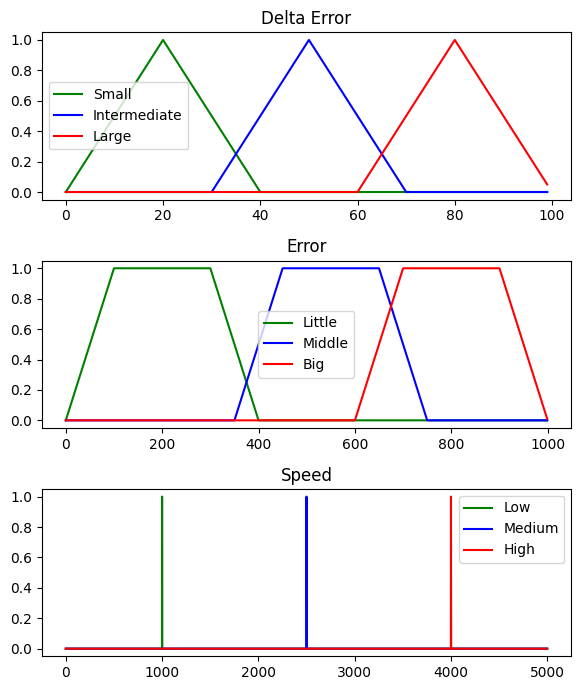

In [4]:
# Create Fuzzy Set Graphs
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(6,7))

ax0.plot(x_DError, DError_SM, 'g', linewidth=1.5, label='Small')
ax0.plot(x_DError, DError_IM, 'b', linewidth=1.5, label='Intermediate')
ax0.plot(x_DError, DError_LG, 'r', linewidth=1.5, label='Large')

ax0.set_title('Delta Error')
ax0.legend()

ax1.plot(x_Error, Error_LE, 'g', linewidth=1.5, label='Little')
ax1.plot(x_Error, Error_ME, 'b', linewidth=1.5, label='Middle')
ax1.plot(x_Error, Error_BE, 'r', linewidth=1.5, label='Big')

ax1.set_title('Error')
ax1.legend()

ax2.plot(x_Speed, Speed_LW, 'g', linewidth=1.5, label='Low')
ax2.plot(x_Speed, Speed_MD, 'b', linewidth=1.5, label='Medium')
ax2.plot(x_Speed, Speed_HG, 'r', linewidth=1.5, label='High')

ax2.set_title('Speed')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [5]:
# Input Value
DError = input("Masukan Nilai DError : ")
Error = input("Masukan Niali Error : ")

Masukan Nilai DError : 50
Masukan Niali Error : 500


In [6]:
# Determining the Rule Base
"""
•R1, IF DError SMALL        && Error LITTLE  THEN Speed = LOW (1000 rpm)
•R2, IF DError SMALL        && Error MIDDLE  THEN Speed = LOW (1000 rpm)
•R3, IF DError SMALL        && Error BIG     THEN Speed = MEDIUM (2500 rpm)
•R4, IF DError INTERMEDIATE && Error LITTLE  THEN Speed = LOW (1000 rpm)
•R5, IF DError INTERMEDIATE && Error MIDDLE  THEN Speed = MEDIUM (2500 rpm)
•R6, IF DError INTERMEDIATE && Error BIG     THEN Speed = HIGH (4000 rpm)
•R7, IF DError LARGE        && Error LITTLE  THEN Speed = MEDIUM (2500 rpm)
•R8, IF DError LARGE        && Error MIDDLE  THEN Speed = HIGH  (4000 rpm)
•R9, IF DError LARGE        && Error BIG     THEN Speed = HIGH  (4000 rpm)

""";

In [7]:
#Determining Degree of Membership

d = [] #Delta Error
d.append(fuzz.interp_membership(x_DError, DError_SM, DError))
d.append(fuzz.interp_membership(x_DError, DError_IM, DError))
d.append(fuzz.interp_membership(x_DError, DError_LG, DError))


e = [] #Error
e.append(fuzz.interp_membership(x_Error, Error_LE, Error))
e.append(fuzz.interp_membership(x_Error, Error_ME, Error))
e.append(fuzz.interp_membership(x_Error, Error_BE, Error))

print("DError Membership Degree ")
if d[0] > 0 :
    print("Small : "+str(d[0]))
if d[1] > 0 :
    print("Intermediate : "+str(d[1]))
if d[2] > 0 :
    print("Large  : "+ str(d[2]))

print("---------")
print("Error Membership Degree")
if e[0]>0 :
    print("Little : "+str(e[0]))
if e[1]>0 :
    print("Middle  : "+ str(e[1]))
if e[2]>0 :
    print("Big  : "+ str(e[2]))

DError Membership Degree 
Intermediate : 1.0
---------
Error Membership Degree
Middle  : 1.0


In [8]:
# Modeling Rule Base and Sugeno Inference /Implifikasi
rule1 = np.fmin(d[0], e[0])
z1 = 1000
if rule1 == 0:
    print("Nilai rule-1 tidak tersedia")
else:
    print("LOW, Nilai rule-1 = ", rule1)
if rule1 > 0:
    print("Nilai z1=", z1)

print("---")

rule2 = np.fmin(d[0], e[1])
z2 = 1000
if rule2 == 0:
    print("Nilai rule-2 tidak tersedia")
else:
    print("LOW, Nilai rule2 = ", rule2)
if rule2 > 0 :
    print("Nilai z7=", z2)

print("---")

rule3 = np.fmin(d[0], e[2])
z3 = 2500
if rule3 == 0:
    print("Nilai rule-3 tidak tersedia")
else:
    print("MEDIUM, Nilai rule-3 = ", rule3)
if rule3 > 0 :
    print("Nilai z7=", z3)

print("---")

rule4 = np.fmin(d[1], e[0])
z4 = 1000
if rule4 == 0:
    print("Nilai rule-4 tidak tersedia")
else:
    print("LOW, Nilai rule-4 = ", rule4)
if rule4 > 0 :
    print("Nilai z7=", z4)

print("---")

rule5 = np.fmin(d[1], e[1])
z5 = 2500
if rule5 == 0:
    print("Nilai rule-5 tidak tersedia")
else:
    print("MEDIUM, Nilai rule-5 = ", rule5)
if rule5 > 0 :
    print("Nilai z7=", z5)

print("---")

rule6 = np.fmin(d[1], e[2])
z6 = 4000
if rule6 == 0:
    print("Nilai rule-6 tidak tersedia")
else:
    print("HIGH, Nilai rule-6 = ", rule6)
if rule6 > 0 :
    print("Nilai z7=", z6)

print("---")

rule7 = np.fmin(d[2], e[0])
z7 = 2500
if rule7 == 0:
    print("Nilai rule-7 tidak tersedia")
else:
    print("MEDIUM, Nilai rule-7 = ", rule7)
if rule7 > 0 :
    print("Nilai z7=", z7)

print("---")

rule8 = np.fmin(d[2], e[1])
z8 = 4000
if rule8 == 0:
    print("Nilai rule-8 tidak tersedia")
else:
    print("HIGH, Nilai rule-8 = ", rule8)
if rule8 > 0 :
    print("Nilai z7=", z8)

print("---")

rule9 = np.fmin(d[2], e[2])
z9 = 4000
if rule9 == 0:
    print("Nilai rule-9 tidak tersedia")
else:
    print("HIGH, Nilai rule-9 = ", rule9)
if rule9 > 0 :
    print("Nilai z7=", z9)



Nilai rule-1 tidak tersedia
---
Nilai rule-2 tidak tersedia
---
Nilai rule-3 tidak tersedia
---
Nilai rule-4 tidak tersedia
---
MEDIUM, Nilai rule-5 =  1.0
Nilai z7= 2500
---
Nilai rule-6 tidak tersedia
---
Nilai rule-7 tidak tersedia
---
Nilai rule-8 tidak tersedia
---
Nilai rule-9 tidak tersedia


In [10]:
# Defazzyfication sugeno
num = (rule1*z1 + rule2*z2 + rule3*z3 + rule4*z4 + rule5*z5 + rule6*z6 + rule7*z7 + rule8*z8 + rule9*z9)
denum = (rule1 + rule2 + rule3 + rule4 + rule5 + rule6 + rule7 + rule8 + rule9)

result = num/denum

#print the result

print("Output Speed: = ", round(result,2), "rpm")

Output Speed: =  2500.0 rpm
